<p> Atualmente só tentei trabalhar um pouco com a base de dados, e gerar os valores que precisaremos para os gráficos. Fiquem livres para qualquer observação ou correção, ou avisar se estiver tudo errado ou desnecessário.</p>
<p> A base de dados usada para os resultadoa abaixo foi baixada do site no dia 21/08</p>

## INICIO CALCULO DADOS PARA INDICADORES(atualizado noutro código gerando o csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tab1 = pd.read_csv('caso_full.csv')

In [3]:
tab1.dropna(axis=0,subset=['city_ibge_code'],inplace=True)
tab1 = tab1.astype({'city_ibge_code':int},copy=False)

In [4]:
tab1

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0000,0,1,city,SP,1,0
1,NaN,35,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0000,0,1,state,SP,1,0
2,São Paulo,3550308,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0000,0,2,city,SP,0,0
3,NaN,35,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0000,0,2,state,SP,0,0
4,São Paulo,3550308,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0000,0,3,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571549,NaN,43,2020-08-20,34,11377239.0,True,False,104068,914.70347,2020-08-20,0.0283,2948,164,state,RS,177,67
571550,NaN,42,2020-08-20,34,7164788.0,True,False,129072,1801.47689,2020-08-20,0.0152,1960,162,state,SC,2222,42
571551,NaN,28,2020-08-20,34,2298696.0,True,False,69502,3023.54030,2020-08-20,0.0253,1757,160,state,SE,435,12
571552,NaN,35,2020-08-20,34,45919049.0,True,False,730828,1591.55735,2020-08-20,0.0382,27905,178,state,SP,9451,314


In [5]:
tab2 = pd.read_csv('pop2020.csv')
tab2

,Unnamed: 0,ARmaior,Armenor,NomeMunic,Total,ano
0,1,ACRE,1200013,Acrelândia - AC,17314.098139,2020
1,2,ACRE,1200054,Assis Brasil - AC,9194.869964,2020
2,3,ACRE,1200104,Brasiléia - AC,24644.963700,2020
3,4,ACRE,1200138,Bujari - AC,10830.598010,2020
4,5,ACRE,1200179,Capixaba - AC,12608.267829,2020
...,...,...,...,...,...,...
5565,5566,TOCANTINS,1721208,Tocantinópolis - TO,21056.027640,2020
5566,5567,TOCANTINS,1721257,Tupirama - TO,1889.616822,2020
5567,5568,TOCANTINS,1721307,Tupiratins - TO,2570.036591,2020
5568,5569,TOCANTINS,1722081,Wanderlândia - TO,10845.015060,2020


In [6]:
Tab = tab1.merge(tab2,how='inner',left_on='city_ibge_code',right_on='Armenor')

In [7]:
Tab

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,...,place_type,state,new_confirmed,new_deaths,Unnamed: 0,ARmaior,Armenor,NomeMunic,Total,ano
0,São Paulo,3550308,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,...,city,SP,1,0,5274,SÃO PAULO,3550308,São Paulo - SP,1.214262e+07,2020
1,São Paulo,3550308,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,...,city,SP,0,0,5274,SÃO PAULO,3550308,São Paulo - SP,1.214262e+07,2020
2,São Paulo,3550308,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,...,city,SP,0,0,5274,SÃO PAULO,3550308,São Paulo - SP,1.214262e+07,2020
3,São Paulo,3550308,2020-02-28,9,12252023.0,False,False,2,0.01632,2020-02-28,...,city,SP,1,0,5274,SÃO PAULO,3550308,São Paulo - SP,1.214262e+07,2020
4,São Paulo,3550308,2020-02-29,9,12252023.0,False,False,2,0.01632,2020-02-29,...,city,SP,0,0,5274,SÃO PAULO,3550308,São Paulo - SP,1.214262e+07,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564648,Rolador,4315958,2020-08-18,34,2323.0,False,False,1,43.04778,2020-08-18,...,city,RS,0,0,4201,RIO GRANDE DO SUL,4315958,Rolador - RS,2.361922e+03,2020
564649,Rolador,4315958,2020-08-19,34,2323.0,False,False,2,86.09557,2020-08-19,...,city,RS,1,0,4201,RIO GRANDE DO SUL,4315958,Rolador - RS,2.361922e+03,2020
564650,Rolador,4315958,2020-08-20,34,2323.0,True,False,2,86.09557,2020-08-20,...,city,RS,0,0,4201,RIO GRANDE DO SUL,4315958,Rolador - RS,2.361922e+03,2020
564651,Ribeirão Corrente,3543105,2020-08-19,34,4718.0,True,False,1,21.19542,2020-08-19,...,city,SP,1,0,5194,SÃO PAULO,3543105,Ribeirão Corrente - SP,4.895874e+03,2020


In [8]:
ultimo_dia_semana = list(Tab[Tab['city']=='São Paulo'].groupby('epidemiological_week')['date'].agg(lambda x:x[x.last_valid_index()]).values)
ultimo_dia_semana

['2020-02-29',
 '2020-03-07',
 '2020-03-14',
 '2020-03-21',
 '2020-03-28',
 '2020-04-04',
 '2020-04-11',
 '2020-04-18',
 '2020-04-25',
 '2020-05-02',
 '2020-05-09',
 '2020-05-16',
 '2020-05-23',
 '2020-05-30',
 '2020-06-06',
 '2020-06-13',
 '2020-06-20',
 '2020-06-27',
 '2020-07-04',
 '2020-07-11',
 '2020-07-18',
 '2020-07-25',
 '2020-08-01',
 '2020-08-08',
 '2020-08-15',
 '2020-08-20']

In [9]:
tab_states = tab1[tab1['place_type']=='state']
# NOVOS CASOS POR ESTADO POR SEMANA, EXEMPLO = SP
tab_states[tab_states['state']=='SP'].groupby('epidemiological_week')['new_confirmed'].agg(np.sum)
# NOVAS MORTES POR ESTADO POR SEMANA, EXEMPLO = SP
tab_states[tab_states['state']=='SP'].groupby('epidemiological_week')['new_deaths'].agg(np.sum)

epidemiological_week
9        0
10       0
11       0
12      15
13      69
14     176
15     300
16     431
17     676
18     919
19    1022
20    1080
21    1357
22    1487
23    1526
24    1523
25    1913
26    1769
27    1733
28    1706
29    1945
30    1870
31    1719
32    1780
33    1764
34    1125
Name: new_deaths, dtype: int64

In [10]:
# CASOS ACUMULADOS POR SEMANA EM SP
tab_states[tab_states['state']=='SP'].groupby('epidemiological_week')['date','last_available_confirmed'].agg(lambda x:x[x.last_valid_index()])
# MORTES ACUMULADAS POR SEMANA EM SP
#tab_states[tab_states['state']=='SP'].groupby('epidemiological_week')['date','last_available_deaths'].agg(lambda x:x[x.last_valid_index()])

C:\Users\vicda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,date,last_available_confirmed
epidemiological_week,,
9,2020-02-29,2
10,2020-03-07,13
11,2020-03-14,65
12,2020-03-21,396
13,2020-03-28,1406
14,2020-04-04,4466
15,2020-04-11,8419
16,2020-04-18,13894
17,2020-04-25,20004


In [11]:
# QUANTIDADE DE CASOS ACUMULADOS POR SEMANA EPIDEMIOLOGICA SOMANDO TODOS OS ESTADOS
tab_states[tab_states['date'].isin(ultimo_dia_semana)].groupby('epidemiological_week')['last_available_confirmed'].agg(sum)
# QUANTIDADE DE MORTES ACUMULADOS POR SEMANA EPIDEMIOLOGICA SOMANDO TODOS OS ESTADOS
#tab_states[tab_states['date'].isin(ultimo_dia_semana)].groupby('epidemiological_week')['last_available_deaths'].agg(sum)

epidemiological_week
9           2
10         19
11        136
12       1132
13       3953
14      10381
15      20991
16      37175
17      59506
18      97430
19     157248
20     234575
21     351125
22     502913
23     676893
24     851779
25    1071337
26    1318551
27    1580041
28    1844313
29    2077955
30    2398993
31    2711992
32    3018397
33    3320108
34    3506525
Name: last_available_confirmed, dtype: int64

## iiiiLENDO CSV 'casos_e_mortes_acumulados_estado' GERADO NOUTRO CÓDIGOiiiii

In [12]:
TAB = pd.read_csv("casos_e_mortes_acumulados_estado.csv",index_col=0)
TAB

,city_ibge_code,last_available_confirmed_week_9,last_available_deaths_week_9,last_available_confirmed_week_10,last_available_deaths_week_10,last_available_confirmed_week_11,last_available_deaths_week_11,last_available_confirmed_week_12,last_available_deaths_week_12,last_available_confirmed_week_13,...,last_available_confirmed_week_30,last_available_deaths_week_30,last_available_confirmed_week_31,last_available_deaths_week_31,last_available_confirmed_week_32,last_available_deaths_week_32,last_available_confirmed_week_33,last_available_deaths_week_33,last_available_confirmed_week_34,last_available_deaths_week_34
AC,12,0.0,0.0,0.0,0.0,0.0,0.0,11,0,25,...,18657,483,19930,535,21498,559,22516,576,23665,598
AL,27,0.0,0.0,0.0,0.0,1.0,0.0,7,0,14,...,54730,1486,60992,1581,66748,1665,72076,1742,75470,1810
AM,13,0.0,0.0,0.0,0.0,2.0,0.0,11,0,111,...,96094,3210,101777,3278,106428,3355,111241,3463,115369,3557
AP,16,0.0,0.0,0.0,0.0,0.0,0.0,1,0,4,...,35162,554,36595,568,38139,601,39431,613,41031,630
BA,29,0.0,0.0,2.0,0.0,7.0,0.0,41,0,127,...,146399,3140,168926,3517,191401,3899,214379,4338,234204,4832
CE,23,0.0,0.0,0.0,0.0,0.0,0.0,84,0,322,...,161844,7480,176371,7704,188289,7954,197381,8129,204931,8288
DF,53,0.0,0.0,1.0,0.0,8.0,0.0,108,0,260,...,94187,1275,107922,1490,121824,1712,135014,1958,147127,2257
ES,32,0.0,0.0,1.0,0.0,4.0,0.0,26,0,61,...,76598,2386,83814,2565,91146,2720,98765,2863,105633,3015
GO,52,0.0,0.0,0.0,0.0,4.0,0.0,19,0,56,...,55567,1380,69820,1691,84963,2017,101290,2314,116058,2735
MA,21,0.0,0.0,0.0,0.0,0.0,0.0,2,0,15,...,113563,2898,121581,3032,129700,3154,136280,3253,143873,3340


In [13]:
# SEPARAR TABELAS COM MORTES E CASOS ATÉ A SEMANA EPIDEMIOLOGICA 31
TAB_DEATHS = TAB[['last_available_deaths_week_9','last_available_deaths_week_10','last_available_deaths_week_11','last_available_deaths_week_12','last_available_deaths_week_13','last_available_deaths_week_14','last_available_deaths_week_15','last_available_deaths_week_16','last_available_deaths_week_17','last_available_deaths_week_18','last_available_deaths_week_19','last_available_deaths_week_20','last_available_deaths_week_21','last_available_deaths_week_22','last_available_deaths_week_23','last_available_deaths_week_24','last_available_deaths_week_25','last_available_deaths_week_26','last_available_deaths_week_27','last_available_deaths_week_28','last_available_deaths_week_29','last_available_deaths_week_30','last_available_deaths_week_31']]
a = list(TAB.columns)
b = list(TAB_DEATHS.columns)
conf =  [i for i in a if i not in b and i not in ['city_ibge_code','last_available_confirmed_week_32',
       'last_available_deaths_week_32', 'last_available_confirmed_week_33',
       'last_available_deaths_week_33', 'last_available_confirmed_week_34',
       'last_available_deaths_week_34']]
TAB_CONFIRMED = TAB[conf]

### Gráficos

#### Gráficos por região

##### Região CENTRO OESTE

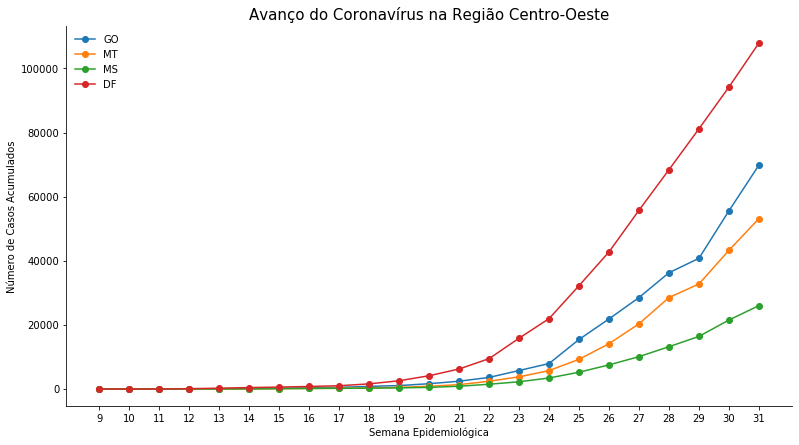

In [14]:
plt.figure(figsize=(13,7))

plt.plot(TAB_CONFIRMED.T[['GO','MT','MS','DF']],'-o')
plt.title('Avanço do Coronavírus na Região Centro-Oeste',fontsize=15)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#plt.gca().set_title('Avanço do Coronavírus por estados')
plt.ylabel('Número de Casos Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['GO','MT','MS','DF'], frameon=False)

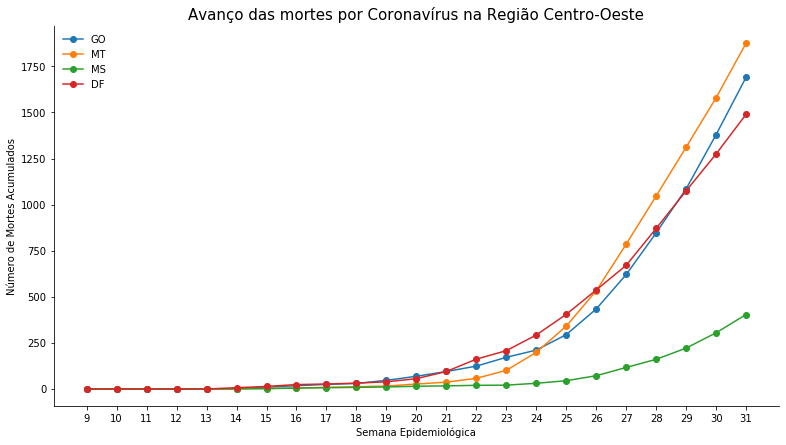

In [15]:
plt.figure(figsize=(13,7))

plt.plot(TAB_DEATHS.T[['GO','MT','MS','DF']],'-o')
plt.title('Avanço das mortes por Coronavírus na Região Centro-Oeste',fontsize=15)

plt.ylabel('Número de Mortes Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['GO','MT','MS','DF'], frameon=False)

##### Região SUDESTE

<IPython.core.display.Javascript object>


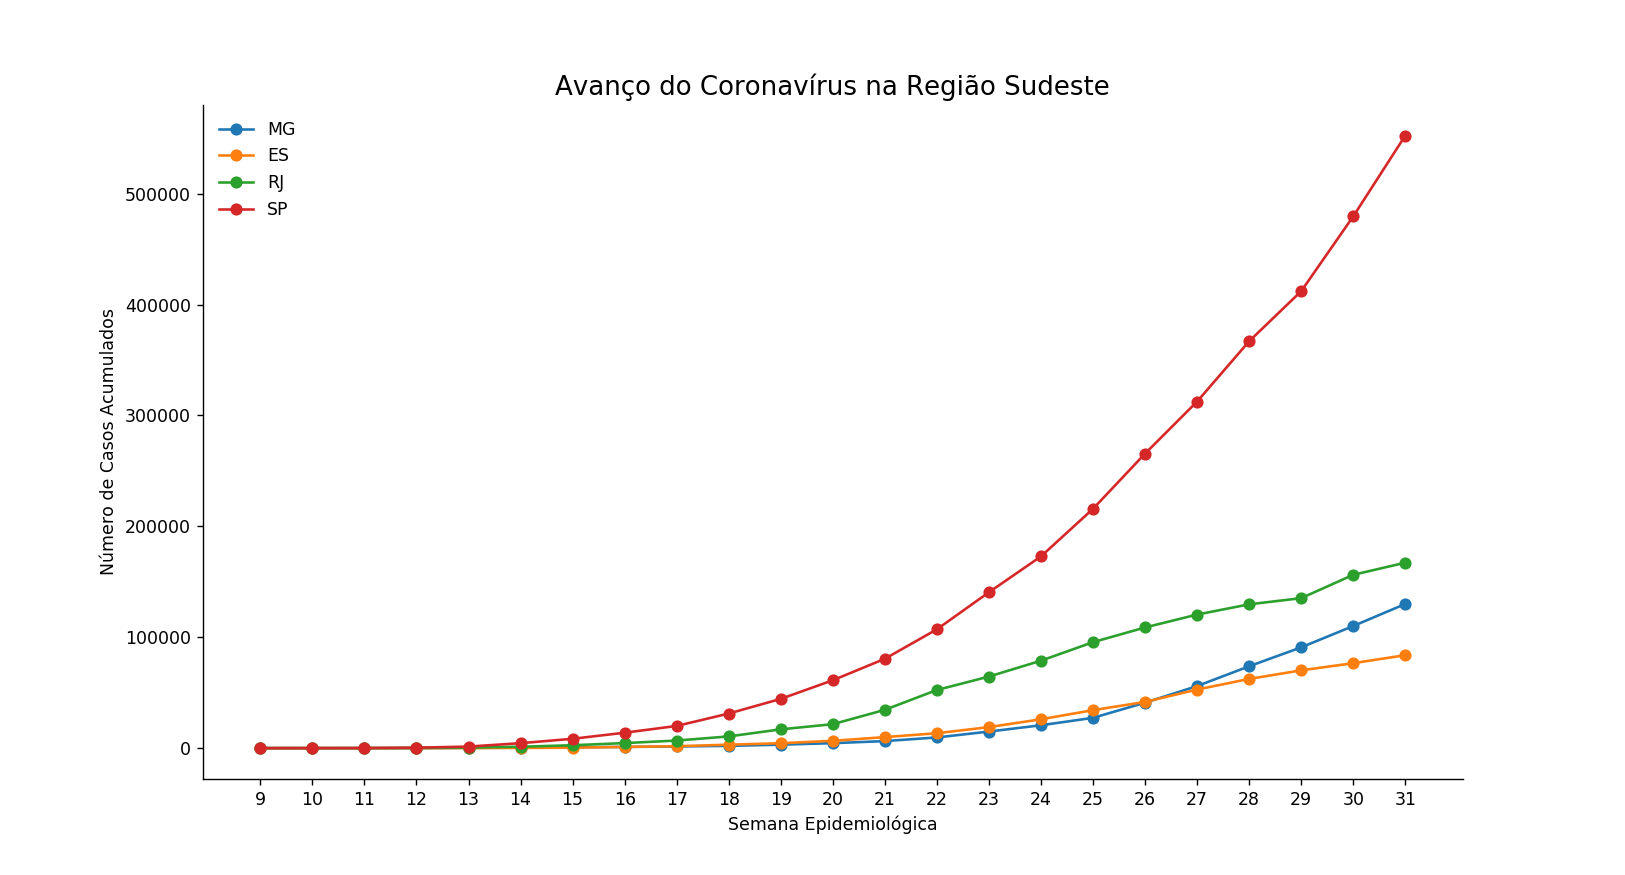

In [34]:
plt.figure(figsize=(13,7))

plt.plot(TAB_CONFIRMED.T[['MG','ES','RJ','SP']],'-o')
plt.title('Avanço do Coronavírus na Região Sudeste',fontsize=15)

plt.ylabel('Número de Casos Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['MG','ES','RJ','SP'], frameon=False)

<IPython.core.display.Javascript object>


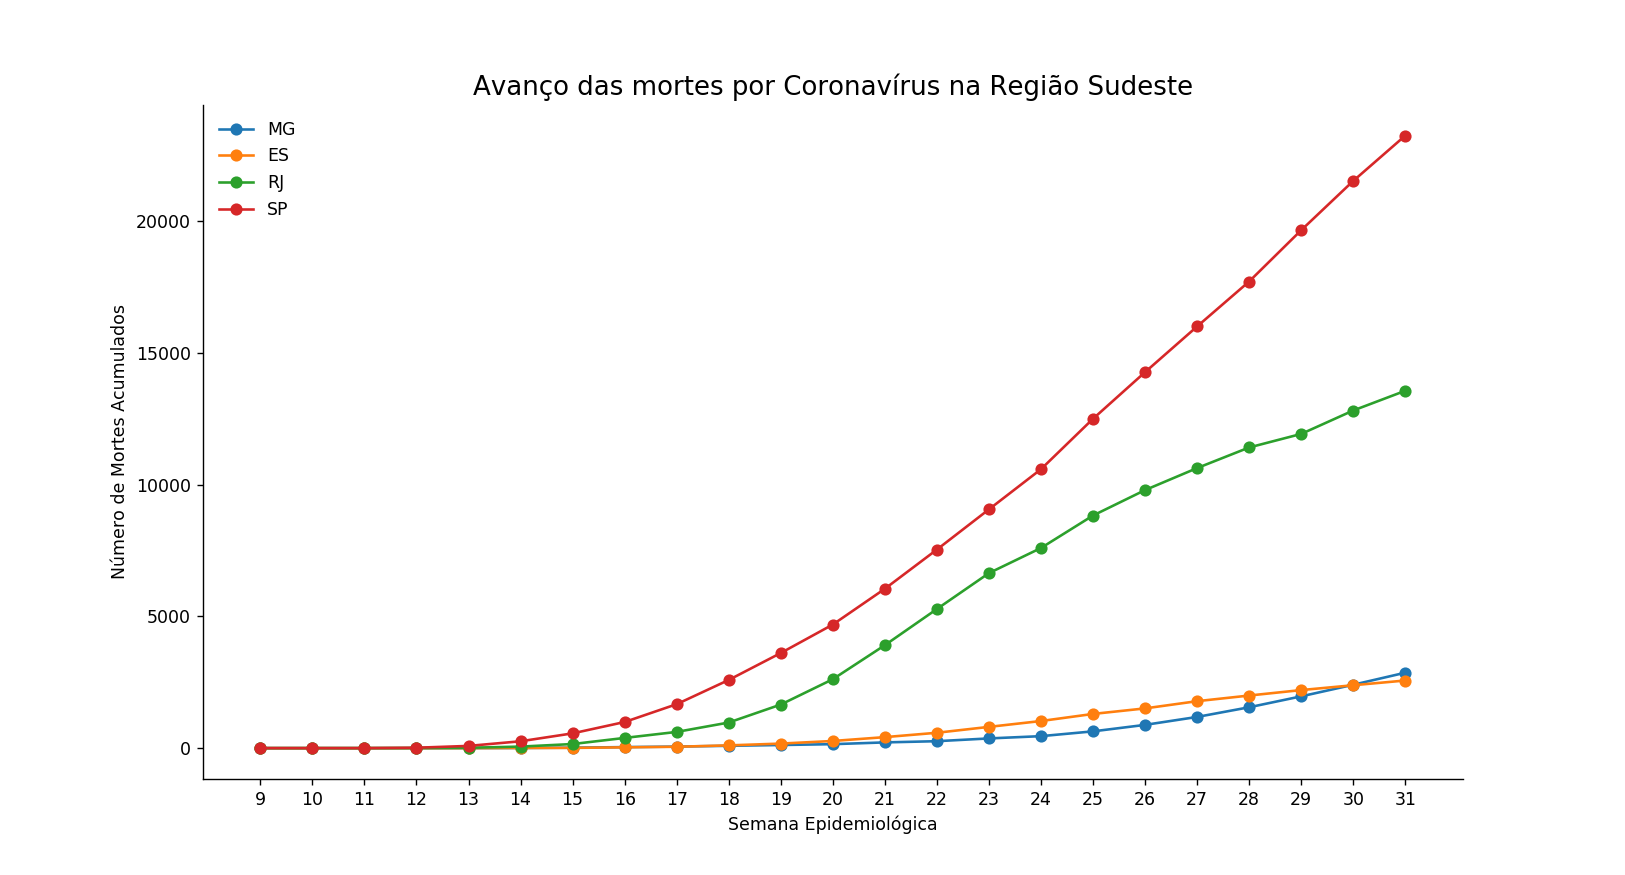

In [35]:
plt.figure(figsize=(13,7))

plt.plot(TAB_DEATHS.T[['MG','ES','RJ','SP']],'-o')
plt.title('Avanço das mortes por Coronavírus na Região Sudeste',fontsize=15)

plt.ylabel('Número de Mortes Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['MG','ES','RJ','SP'], frameon=False)

##### Região SUL

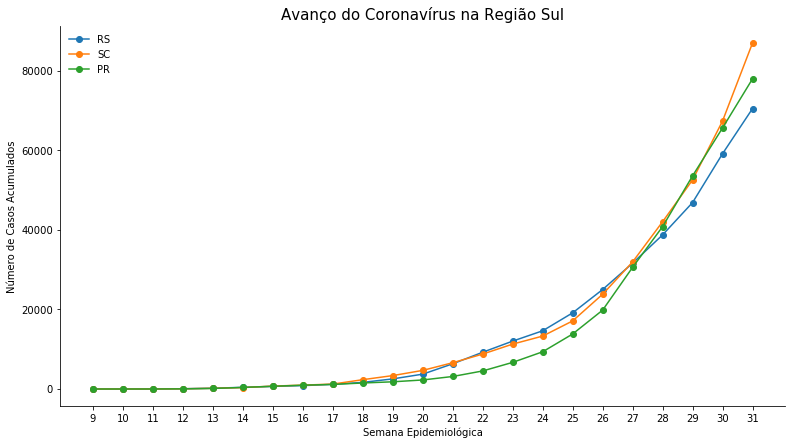

In [18]:
plt.figure(figsize=(13,7))

plt.plot(TAB_CONFIRMED.T[['RS','SC','PR']],'-o')
plt.title('Avanço do Coronavírus na Região Sul',fontsize=15)

plt.ylabel('Número de Casos Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['RS','SC','PR'], frameon=False)

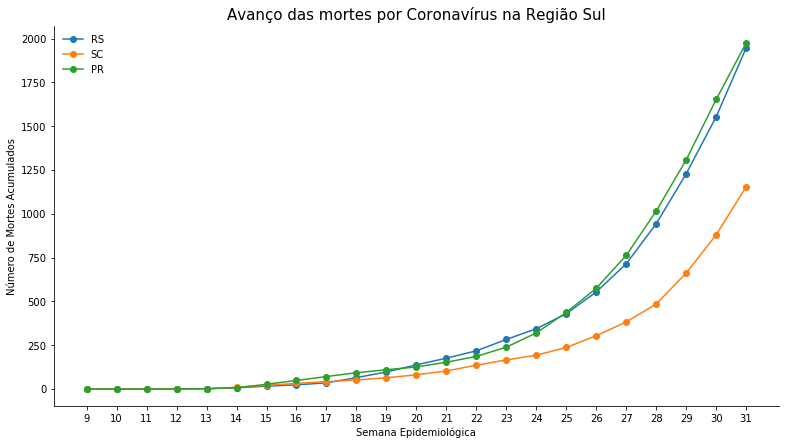

In [19]:
plt.figure(figsize=(13,7))

plt.plot(TAB_DEATHS.T[['RS','SC','PR']],'-o')
plt.title('Avanço das mortes por Coronavírus na Região Sul',fontsize=15)

plt.ylabel('Número de Mortes Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['RS','SC','PR'], frameon=False)

##### Região NORDESTE

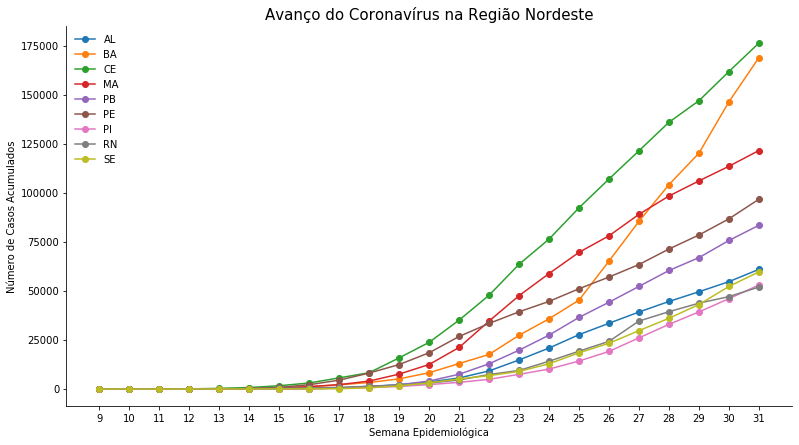

In [20]:
plt.figure(figsize=(13,7))

plt.plot(TAB_CONFIRMED.T[['AL','BA','CE','MA','PB','PE','PI','RN','SE']],'-o')
plt.title('Avanço do Coronavírus na Região Nordeste',fontsize=15)

plt.ylabel('Número de Casos Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['AL','BA','CE','MA','PB','PE','PI','RN','SE'], frameon=False)

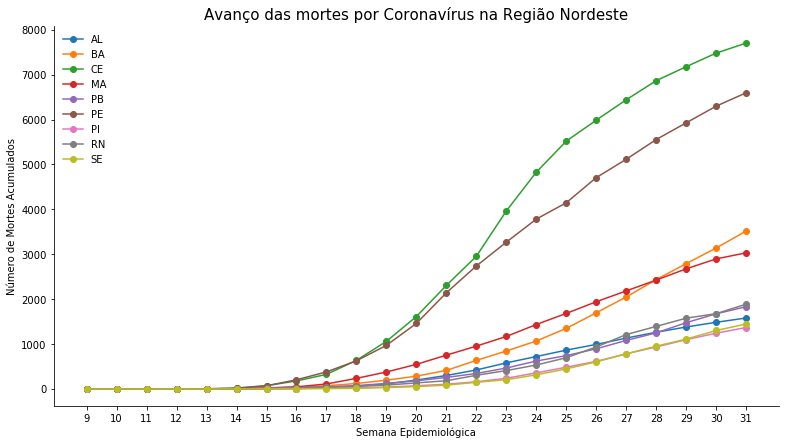

In [21]:
plt.figure(figsize=(13,7))

plt.plot(TAB_DEATHS.T[['AL','BA','CE','MA','PB','PE','PI','RN','SE']],'-o')
plt.title('Avanço das mortes por Coronavírus na Região Nordeste',fontsize=15)

plt.ylabel('Número de Mortes Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['AL','BA','CE','MA','PB','PE','PI','RN','SE'], frameon=False)

##### Região NORTE

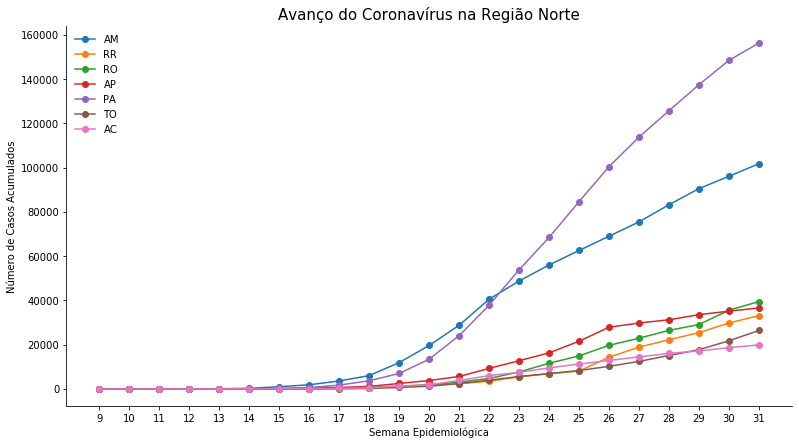

In [22]:
plt.figure(figsize=(13,7))

plt.plot(TAB_CONFIRMED.T[['AM','RR','RO','AP','PA','TO','AC']],'-o')
plt.title('Avanço do Coronavírus na Região Norte',fontsize=15)

plt.ylabel('Número de Casos Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['AM','RR','RO','AP','PA','TO','AC'], frameon=False)

In [85]:
TAB_DEATHS.T[['AM','RR','RO','AP','PA','TO','AC']].loc['last_available_deaths_week_31']

AM    3278.0
RR     513.0
RO     881.0
AP     568.0
PA    5773.0
TO     395.0
AC     535.0
Name: last_available_deaths_week_31, dtype: float64

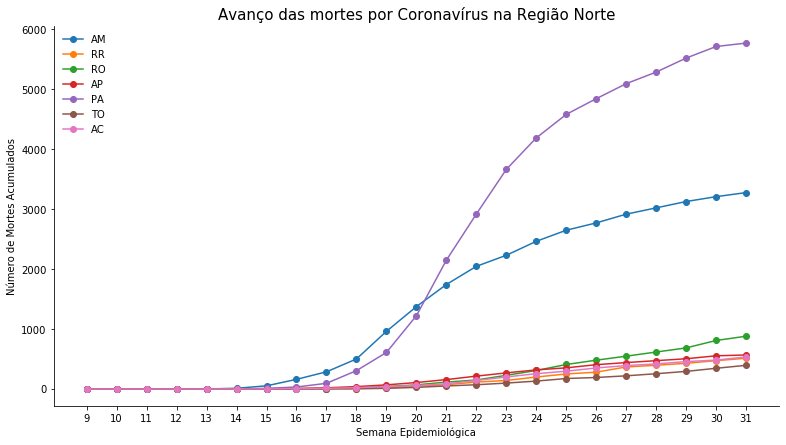

In [23]:
plt.figure(figsize=(13,7))

plt.plot(TAB_DEATHS.T[['AM','RR','RO','AP','PA','TO','AC']],'-o')
plt.title('Avanço das mortes por Coronavírus na Região Norte',fontsize=15)

plt.ylabel('Número de Mortes Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['AM','RR','RO','AP','PA','TO','AC'], frameon=False)

#### Gráfico TOTAL

In [69]:
regioes = TAB[:-1].copy()
regioes['regiao'] = ['NO','ND','NO','NO','ND','ND','CO','SD','CO','ND','SD','CO','CO','NO','ND','ND','ND','SL','SD','ND','NO','NO','SL','SL','ND','SD','NO']
regiao_sum = regioes.groupby('regiao').agg(sum)

In [90]:
death = list(TAB_DEATHS.columns)

<IPython.core.display.Javascript object>


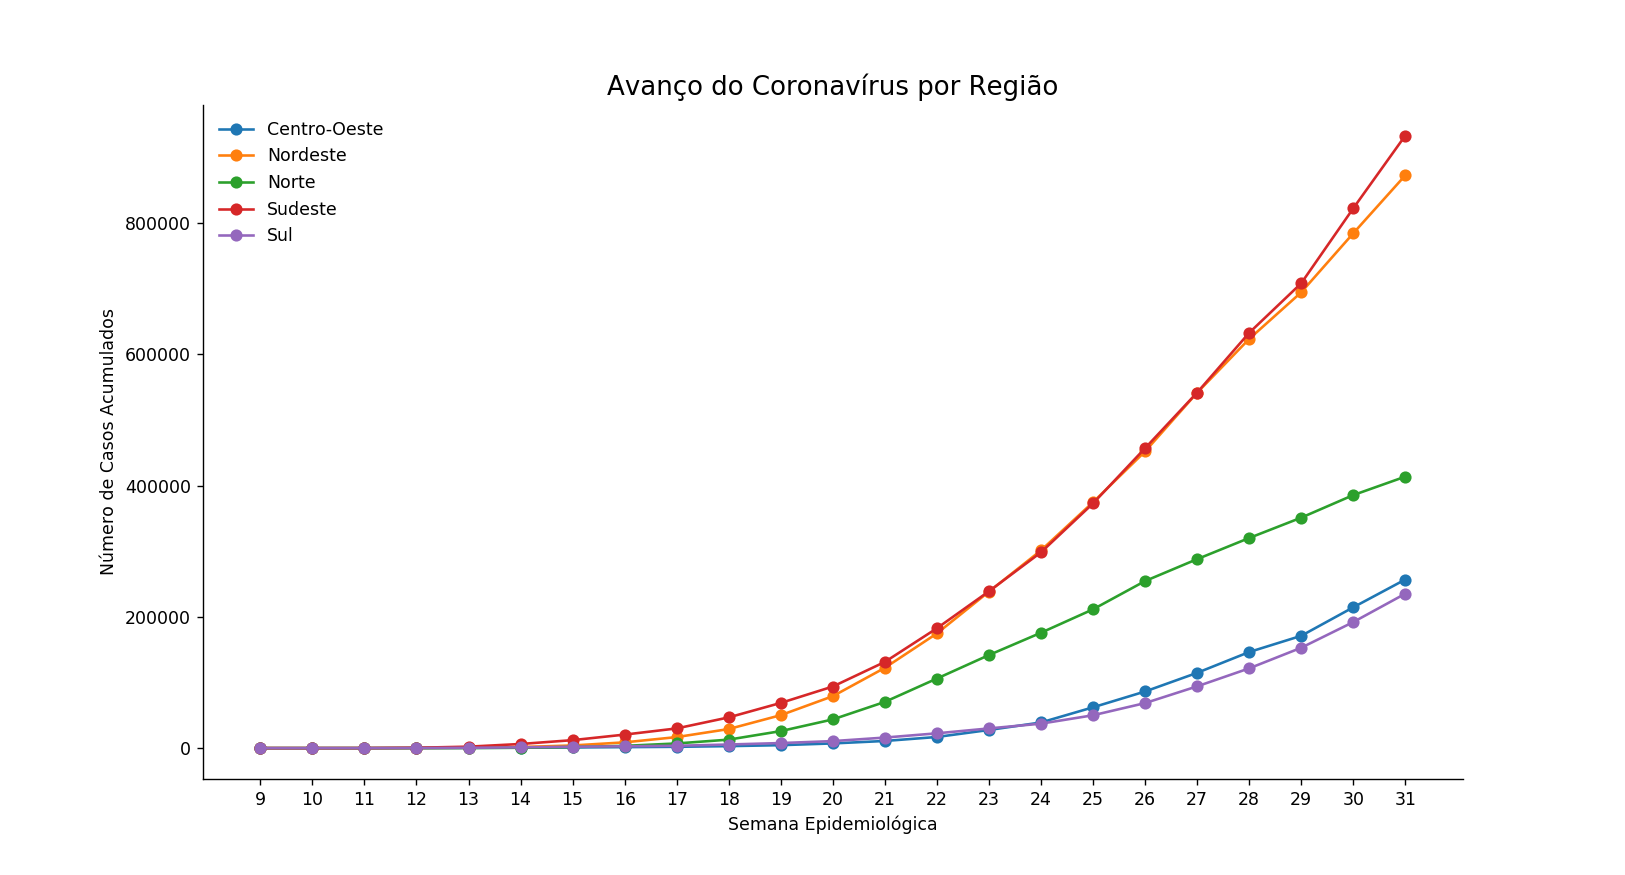

In [82]:
plt.figure(figsize=(13,7))

plt.plot(regiao_sum[conf].T,'-o')
plt.title('Avanço do Coronavírus por Região',fontsize=15)

plt.ylabel('Número de Casos Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['Centro-Oeste','Nordeste','Norte','Sudeste','Sul'], frameon=False)

<IPython.core.display.Javascript object>


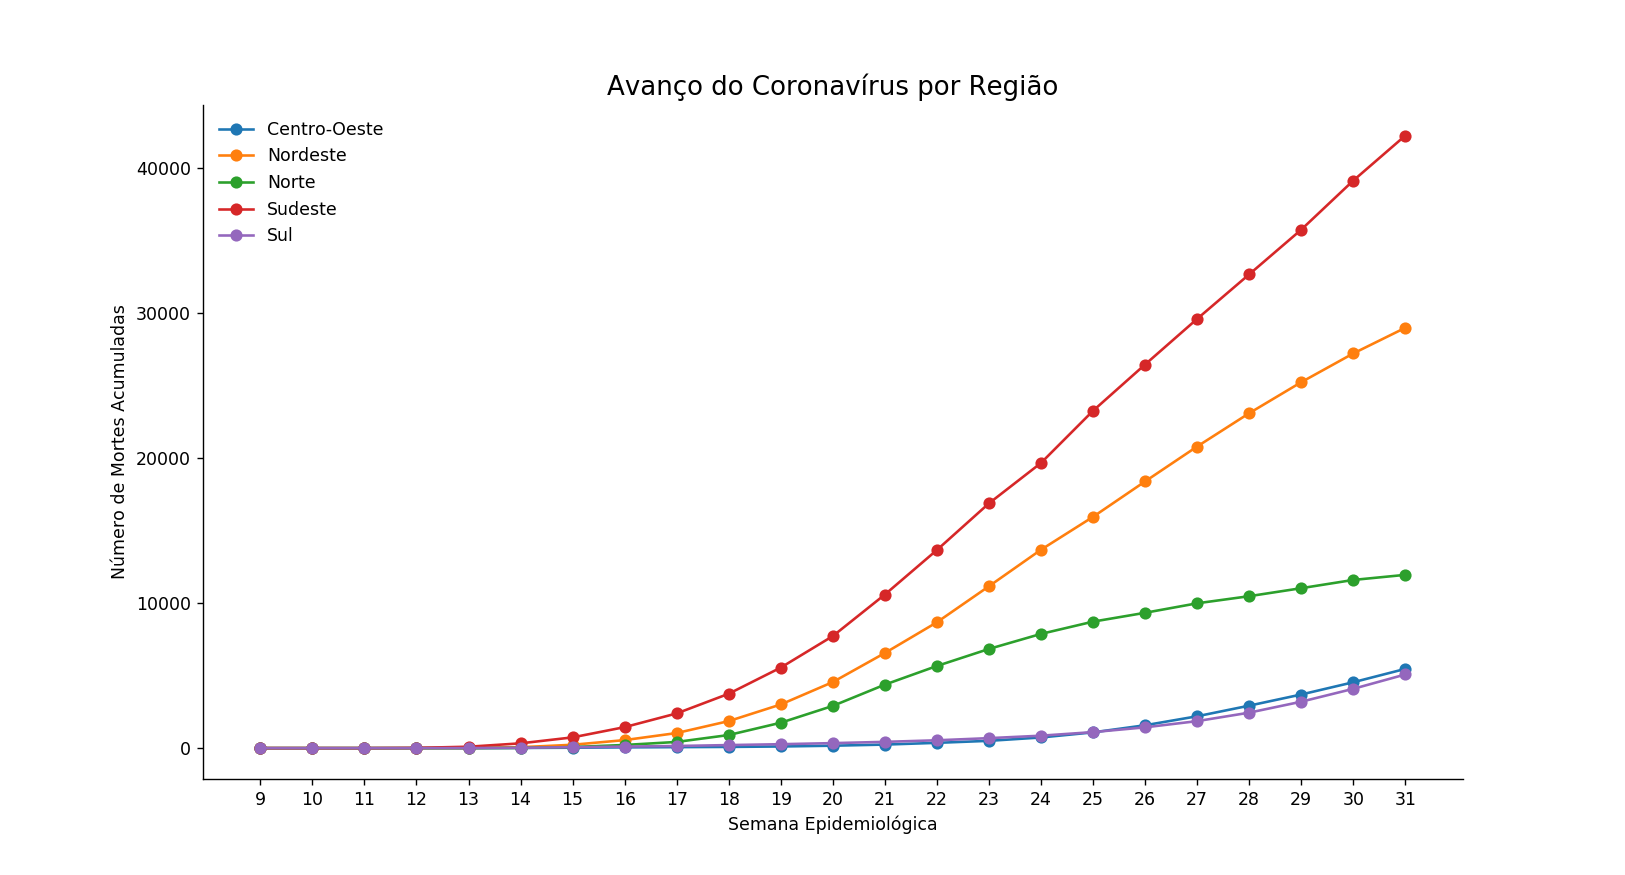

In [91]:
plt.figure(figsize=(13,7))

plt.plot(regiao_sum[death].T,'-o')
plt.title('Avanço do Coronavírus por Região',fontsize=15)

plt.ylabel('Número de Mortes Acumuladas')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['Centro-Oeste','Nordeste','Norte','Sudeste','Sul'], frameon=False)

<IPython.core.display.Javascript object>


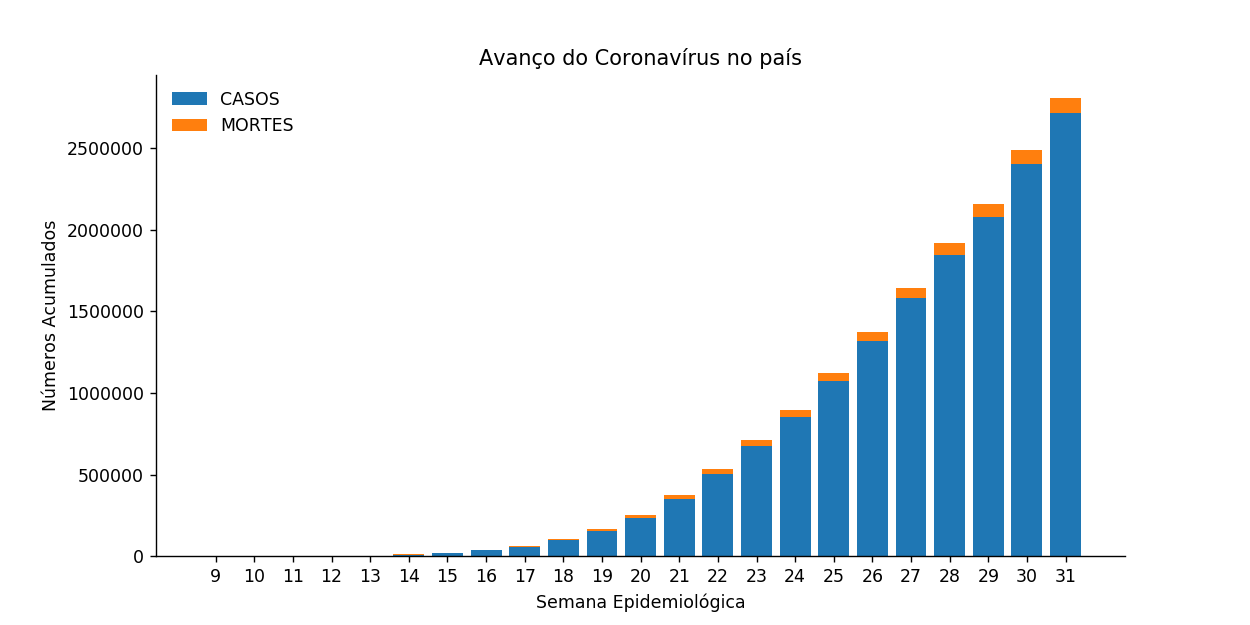

In [38]:
plt.figure(figsize=(10,5))

plt.bar(list(range(23)),TAB_CONFIRMED.T['TOTAL'].values)
plt.bar(list(range(23)),TAB_DEATHS.T['TOTAL'].values, bottom = TAB_CONFIRMED.T['TOTAL'].values)

plt.title('Avanço do Coronavírus no país')
plt.ylabel('Números Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['CASOS','MORTES'], frameon=False)

### ANIMAÇÕES

#### ANIMAÇÃO COM EIXO Y VARIANTE

In [29]:
%matplotlib notebook
import matplotlib.animation as animation


In [36]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == 22: 
        a.event_source.stop()
    #bins = np.arange(-4, 4, 0.5)
    #plt.hist(x[:curr], bins=bins)
    plt.cla()
    string_casos = 'last_available_confirmed_week_' + str((9+curr))
    string_mortes = 'last_available_deaths_week_' + str((9+curr))
    
    low = 0
    high = max(TAB_CONFIRMED[:-1][string_casos].values)*1.1
    plt.ylim([low, high])

    plt.bar(TAB_CONFIRMED[:-1].index,TAB_CONFIRMED[:-1][string_casos].values)
    plt.bar(TAB_DEATHS[:-1].index,TAB_DEATHS[:-1][string_mortes].values, bottom=TAB_CONFIRMED[:-1][string_casos].values)
    plt.legend(['CASOS','MORTES'], frameon=False)
    #plt.axis([-4,4,0,30])
    plt.gca().set_title('Avanço do Coronavírus por estados')
    plt.gca().set_ylabel('Números Acumulados')
    plt.gca().set_xlabel('Estado')
    plt.annotate('Semana Epidemiológica = {}'.format(curr+9),[15,max(TAB_CONFIRMED[:-1][string_casos].values)])


<IPython.core.display.Javascript object>


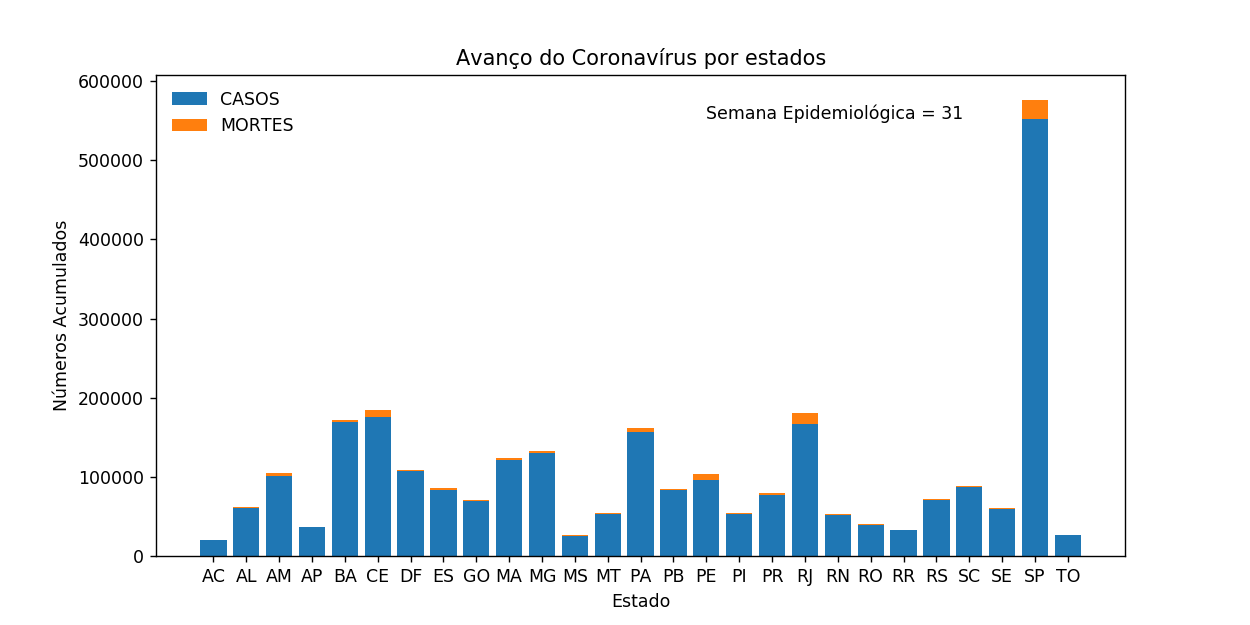

In [37]:
fig = plt.figure(figsize=(10,5))
a = animation.FuncAnimation(fig, update, interval=200, repeat=True, repeat_delay=0)

#### ANIMAÇÃO COM EIXO Y FIXO

In [32]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == 22: 
        a.event_source.stop()
    #bins = np.arange(-4, 4, 0.5)
    #plt.hist(x[:curr], bins=bins)
    plt.cla()
    string_casos = 'last_available_confirmed_week_' + str((9+curr))
    string_mortes = 'last_available_deaths_week_' + str((9+curr))
    
    low = 0
    high = max(TAB_CONFIRMED[:-1]['last_available_confirmed_week_31'])#[string_casos].values)
    plt.ylim([low, high*1.1])

    plt.bar(TAB_CONFIRMED[:-1].index,TAB_CONFIRMED[:-1][string_casos].values)
    plt.bar(TAB_DEATHS[:-1].index,TAB_DEATHS[:-1][string_mortes].values, bottom=TAB_CONFIRMED[:-1][string_casos].values)
    plt.legend(['CASOS','MORTES'], frameon=False, loc='upper left')
    #plt.axis([-4,4,0,30])
    plt.gca().set_title('Avanço do Coronavírus por estados')
    plt.gca().set_ylabel('Números Acumulados')
    plt.gca().set_xlabel('Estado')
    plt.annotate('Semana Epidemiológica = {}'.format(curr+9),[15,high])#max(TAB_CONFIRMED[:-1][string_casos].values)])


<IPython.core.display.Javascript object>


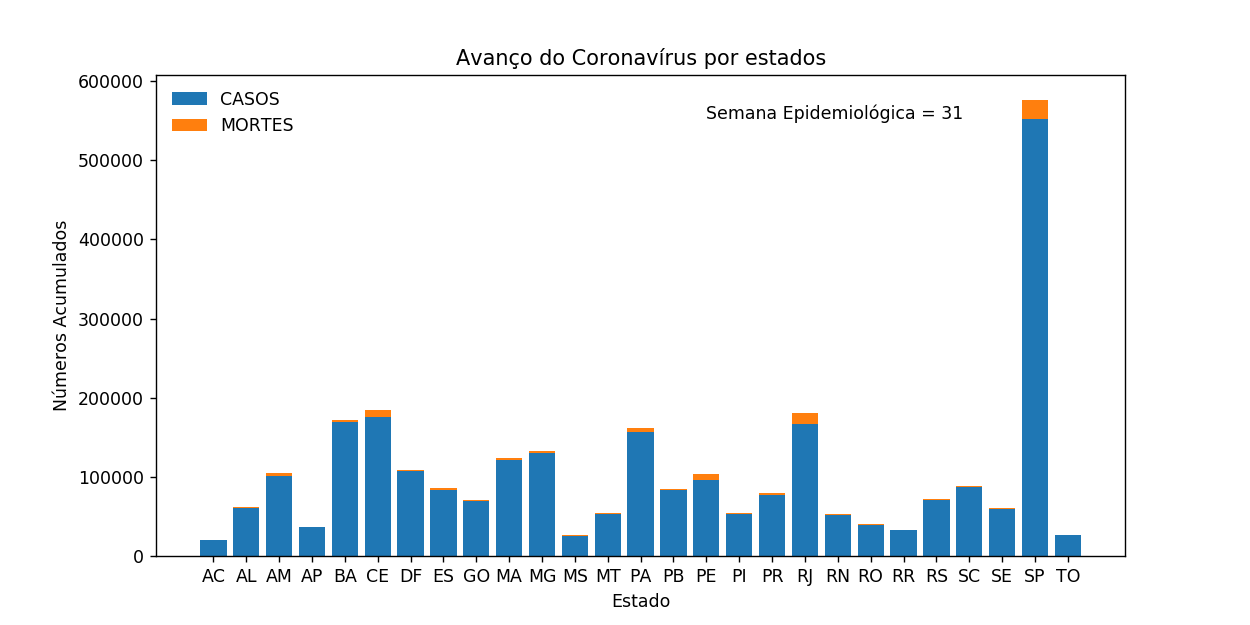

In [33]:
fig = plt.figure(figsize=(10,5))
a = animation.FuncAnimation(fig, update, interval=200, repeat=True, repeat_delay=0)

# iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiRESTOSiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii

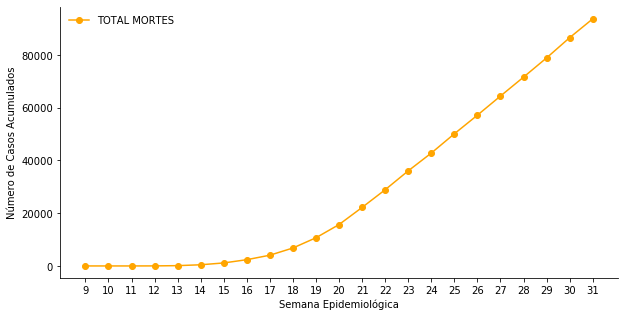

In [25]:
plt.figure(figsize=(10,5))

#plt.plot(list(range(26)),TAB_CONFIRMED.T['TOTAL'].values,'-o')
plt.plot(list(range(23)),TAB_DEATHS.T['TOTAL'].values,'-o',c='orange')
plt.ylabel('Número de Casos Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['TOTAL MORTES'], frameon=False)

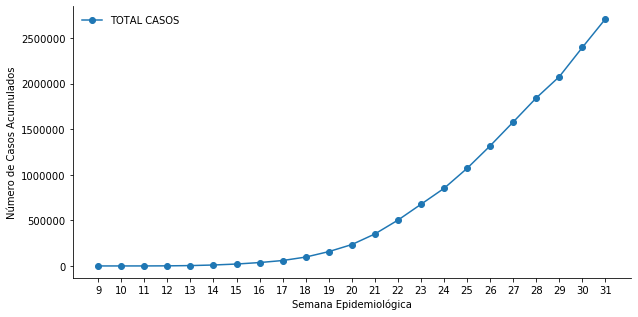

In [24]:
plt.figure(figsize=(10,5))

plt.plot(list(range(23)),TAB_CONFIRMED.T['TOTAL'].values,'-o')
#plt.plot(list(range(26)),TAB_DEATHS.T['TOTAL'].values,'-o')

plt.ylabel('Número de Casos Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['TOTAL CASOS'], frameon=False)

<IPython.core.display.Javascript object>


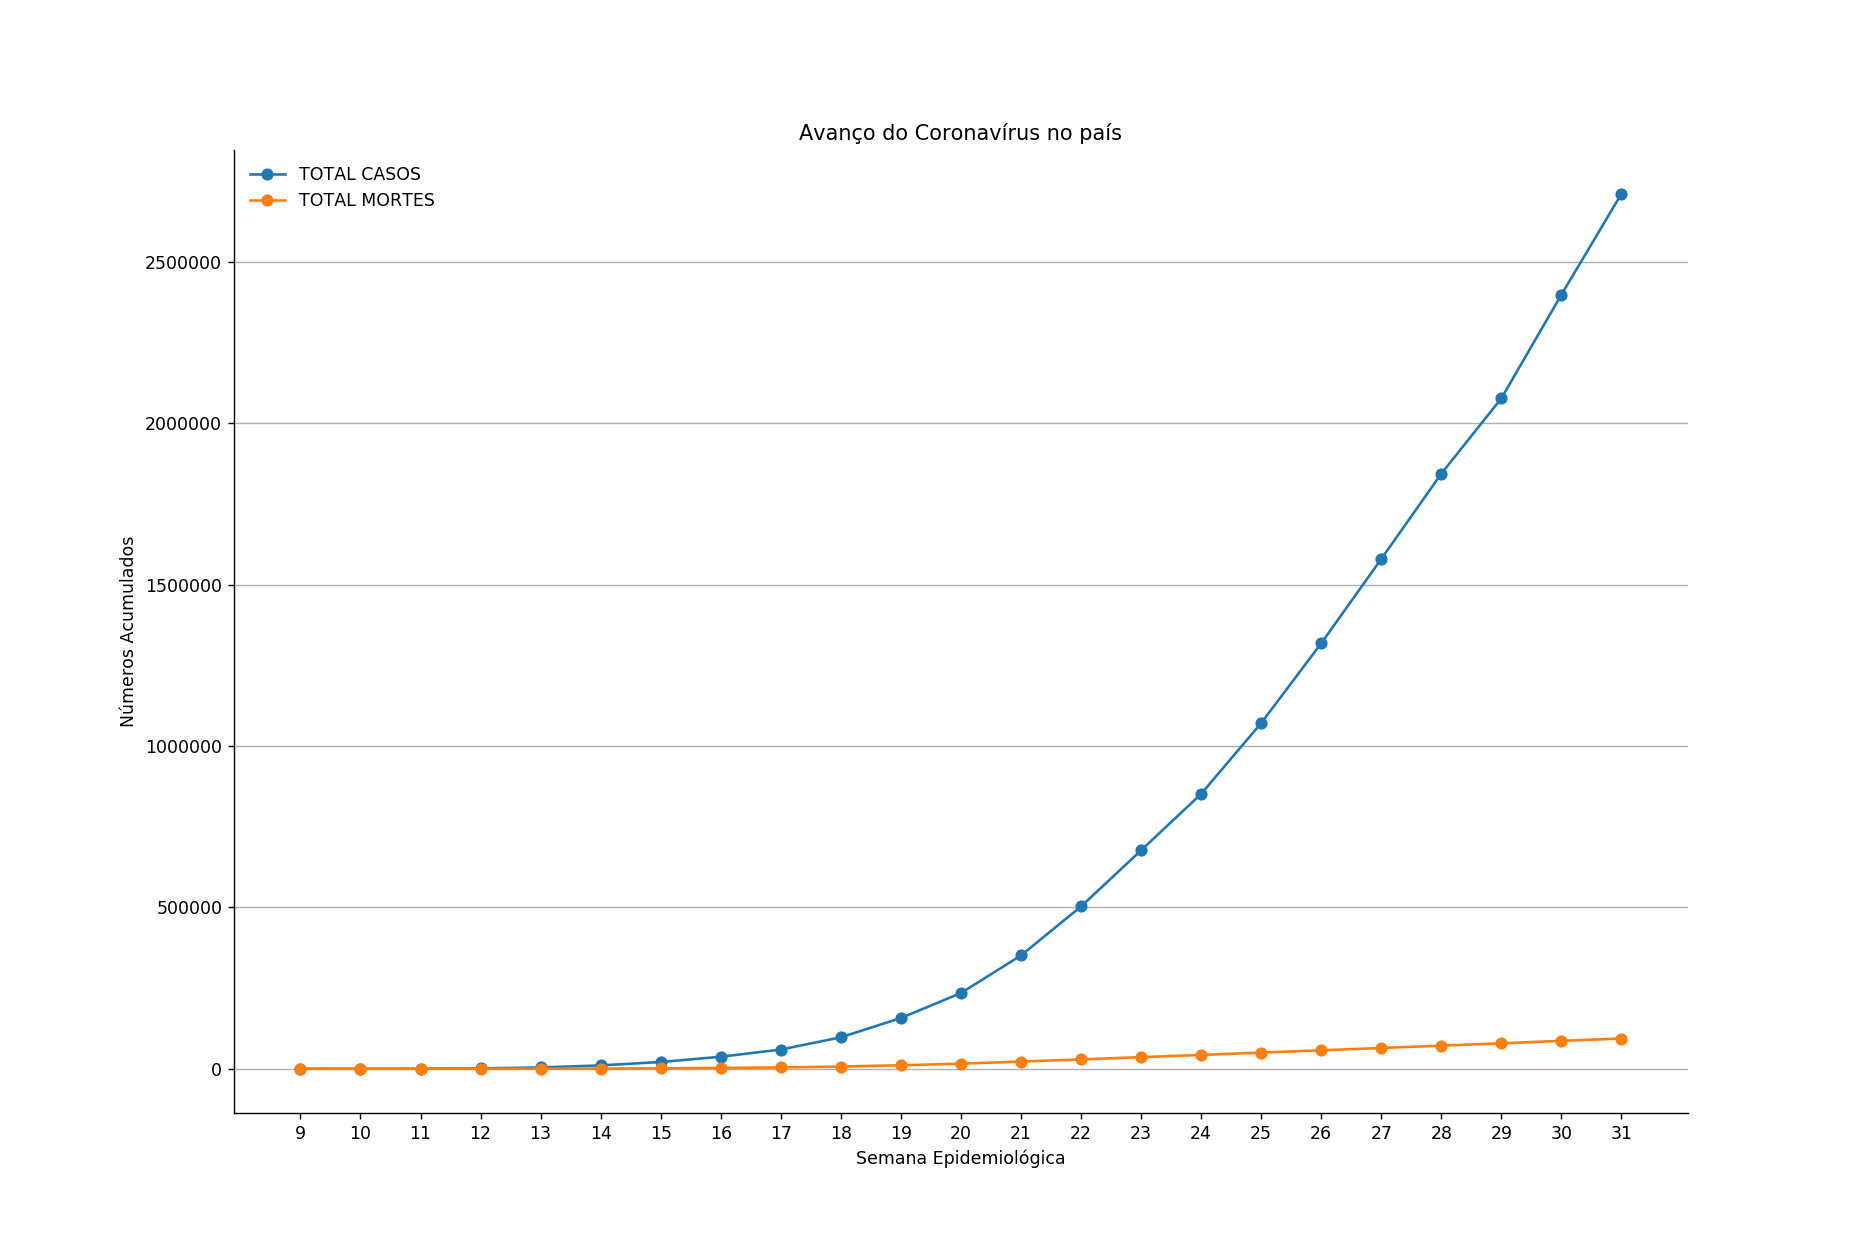

In [42]:
plt.figure(figsize=(15,10))

plt.plot(list(range(23)),TAB_CONFIRMED.T['TOTAL'].values,'-o')
plt.plot(list(range(23)),TAB_DEATHS.T['TOTAL'].values,'-o')

plt.title('Avanço do Coronavírus no país')
plt.ylabel('Números Acumulados')
plt.xlabel('Semana Epidemiológica')

plt.grid(True,axis='y')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['TOTAL CASOS','TOTAL MORTES'], frameon=False)

<IPython.core.display.Javascript object>


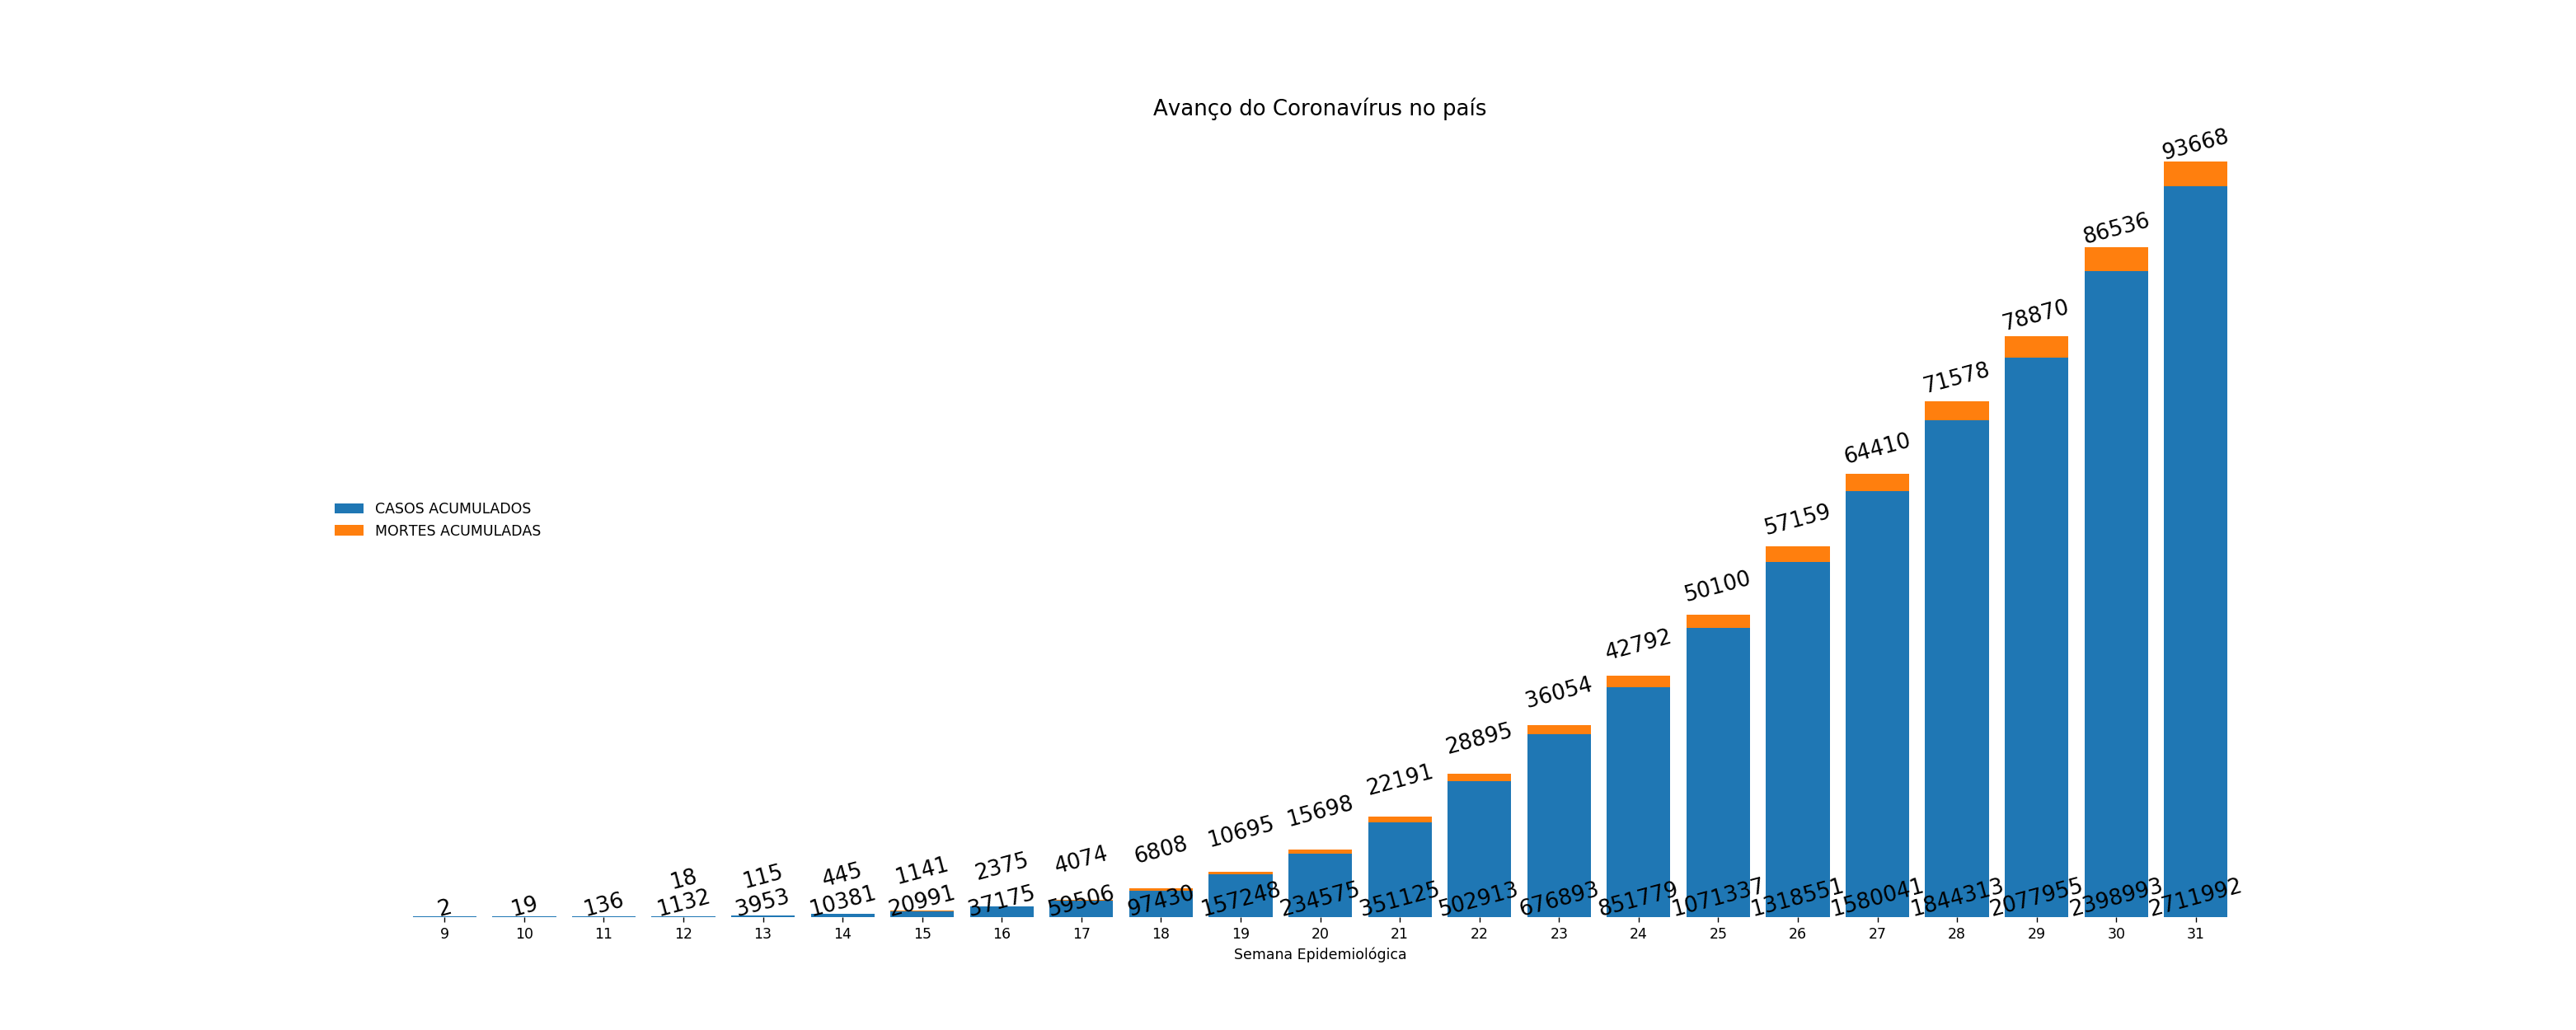

In [41]:
plt.figure(figsize=(25,10))
p=[]

p.append(plt.bar(list(range(23)),TAB_CONFIRMED.T['TOTAL'].values))
p.append(plt.bar(list(range(23)),TAB_DEATHS.T['TOTAL'].values, bottom = TAB_CONFIRMED.T['TOTAL'].values))

plt.title('Avanço do Coronavírus no país',fontsize=15)
plt.xlabel('Semana Epidemiológica')
h=[0]*26
cont = 0
for bars in p:
    for bar in bars:
        if bar.get_height()!=0:
            plt.gca().text(bar.get_x() + bar.get_width()/2, h[cont] + 1000, str(int(bar.get_height())),
                               ha='center', color='black', fontsize=15, rotation = 15)
        h[cont] += bar.get_height() + 100000
        cont+=1
    cont = 0

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.gca().axes.get_yaxis().set_visible(False)
plt.xticks(list(range(23)),list(range(9,32)))
plt.legend(['CASOS ACUMULADOS','MORTES ACUMULADAS'], frameon=False, loc='center left')